## Data analysis

In [9]:
import seaborn as sns
import pandas as pd
import numpy as np

In [26]:
df_mk1        = pd.read_csv("clean_data/clean_data_mk1_i5pyilec.csv")
df_mk2        = pd.read_csv("clean_data/clean_data_mk2_dzoz67y9.csv")
df_mk3        = pd.read_csv("clean_data/clean_data_mk3_mklqs5l0.csv")
df_mk4        = pd.read_csv("clean_data/clean_data_mk4_080ps8pg.csv")
combined_data = pd.read_csv("clean_data/combined_data/combined_data.csv")

In [27]:
#Exclude participants
combined_data = combined_data.loc[combined_data["prolific_id"] != "I am the experimenter."] #exclude us, i.e. player 4 in first pilot
combined_data = combined_data.loc[combined_data["participant_code"] != "j89thiah"] #exclude woman with baby in session 1, i.e. player 5 in first pilot.
combined_data = combined_data.loc[combined_data["participant_code"] != "97ajc1w1"] #exclude p4 in session Mklqs5l0, was inactive during entire thing except for round 1 (dropout)- 

## Acceptance rate of offers

In [41]:
#Create unique players
combined_data["player"] = combined_data["player"].astype(str)
combined_data["player"] = combined_data["player"] + combined_data["prolific_id"]

#combine session code with mastok session
combined_data['mk_session'] = combined_data['mk_session'].replace('mk:Ultimatum_Game_Real:', 'mk_', regex=True)
combined_data['mk_session'] = combined_data['mk_session'] + "_" + combined_data['session_code']

#Create a new column for manip of other player in each dyad. 
combined_data["other_manipulation"] = np.where(combined_data["manipulation"] == "dominant", "submissive", "dominant")
#Create a new column categorizing sent offers as either fair or unfair. 1 = fair, 0 = unfair
combined_data["fair_offer"]         = np.where(combined_data["sent_amount"] >=5, 1, 0)

In [46]:

print(combined_data["offer_response"].mean()) #94.9 of offers are accepted. 
print(combined_data["fair_offer"].mean()) #79% of offers are fair. 
print(combined_data.groupby("fair_offer")['offer_response'].mean())
#   fair_offer        mean
#       0           0.742857
#       1           0.993808

print(combined_data.groupby(["other_manipulation"])['offer_response'].mean())

#    other_manipulation       mean
#     dominant               0.949239
#    submissive              0.948980

print(combined_data.groupby(["other_manipulation"])['offer_response'].sum())
#   other_manipulation        sum
#       dominant             187.0
#       submissive           186.0

print(combined_data.groupby(["mk_session"])['offer_response'].mean())

#     mk_session        mean
#    mk_1_i5pyilec    0.973684
#    mk_2_dzoz67y9    0.879310
#    mk_3_mklqs5l0    1.000000
#    mk_4_080ps8pg    0.966667


0.9491094147582697
0.7904761904761904
fair_offer
0    0.742857
1    0.993808
Name: offer_response, dtype: float64
other_manipulation
dominant      0.949239
submissive    0.948980
Name: offer_response, dtype: float64
other_manipulation
dominant      187.0
submissive    186.0
Name: offer_response, dtype: float64
mk_session
mk_1_i5pyilec    0.973684
mk_2_dzoz67y9    0.879310
mk_3_mklqs5l0    1.000000
mk_4_080ps8pg    0.966667
Name: offer_response, dtype: float64


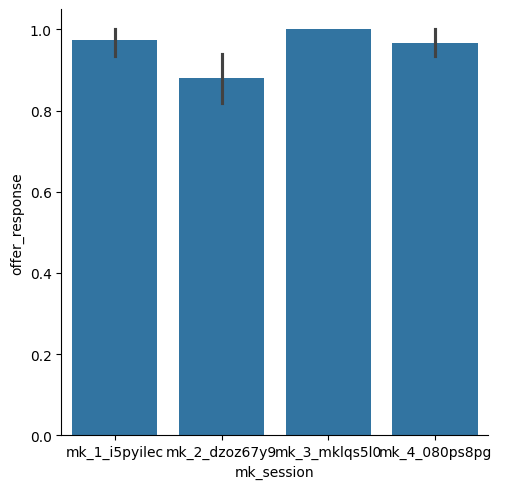

In [44]:
sns.catplot(x = "mk_session", y = "offer_response", kind = "bar", data = combined_data)

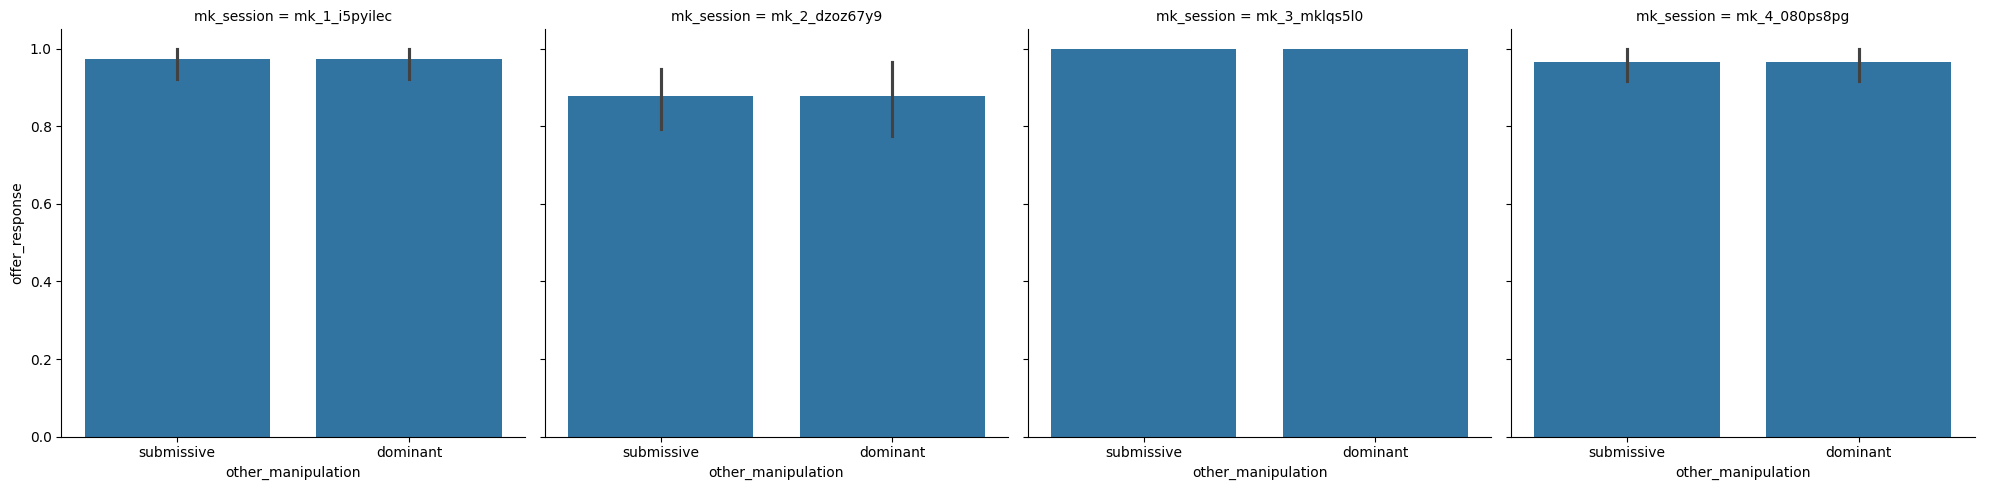

In [48]:
sns.catplot(x = "other_manipulation", y = "offer_response", kind = "bar", col = "mk_session", data = combined_data)

## Trial Payoff

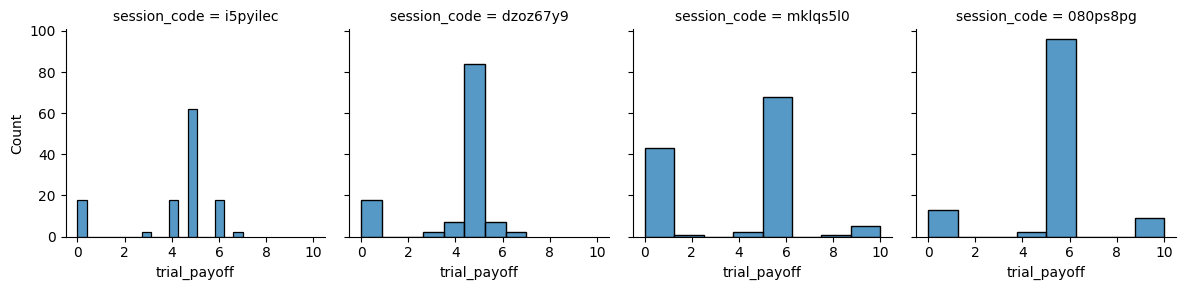

In [98]:
g = sns.FacetGrid(combined_data, col="session_code")
g.map(sns.histplot, "trial_payoff")

In [129]:
df_mk1 = combined_data.loc[combined_data["session_code"] == "i5pyilec"]
df_analysis = df_mk1.groupby(["role", "manipulation", "player"])['trial_payoff'].mean().reset_index()

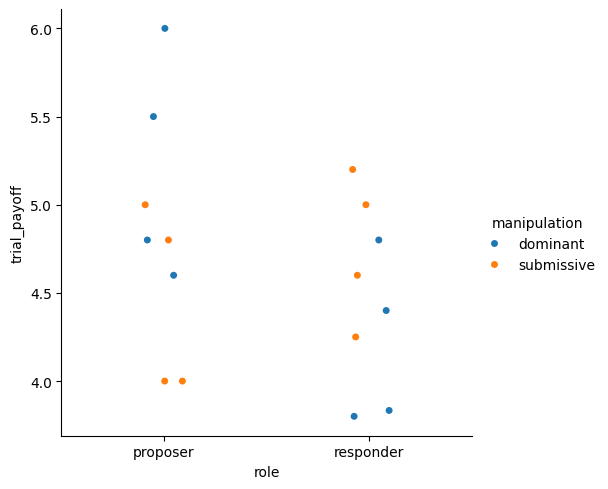

In [130]:

sns.catplot(x = "role", hue="manipulation", y="trial_payoff", data= df_analysis)

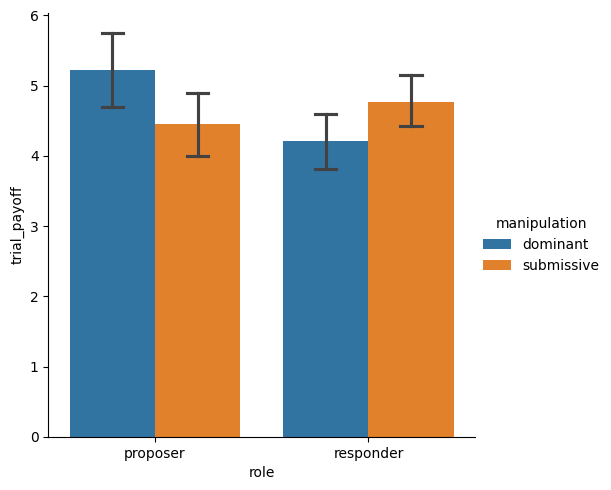

In [131]:

sns.catplot(x = "role", hue="manipulation", y="trial_payoff", kind ="bar", capsize=.2, data= df_analysis)


<Axes: xlabel='manipulation', ylabel='trial_payoff'>

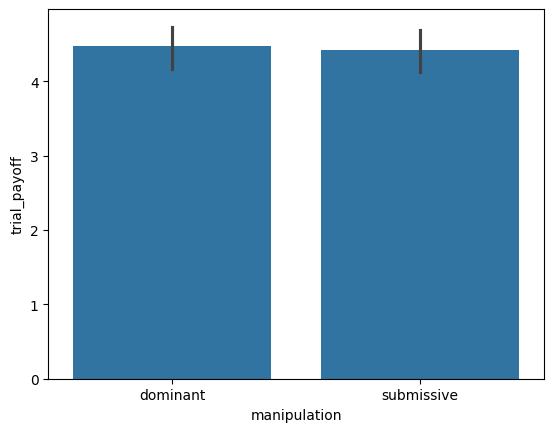

In [77]:
sns.barplot(x = "manipulation", y="trial_payoff", data= combined_data)

In [86]:
df_mk3["offer_response"].mean()

1.0

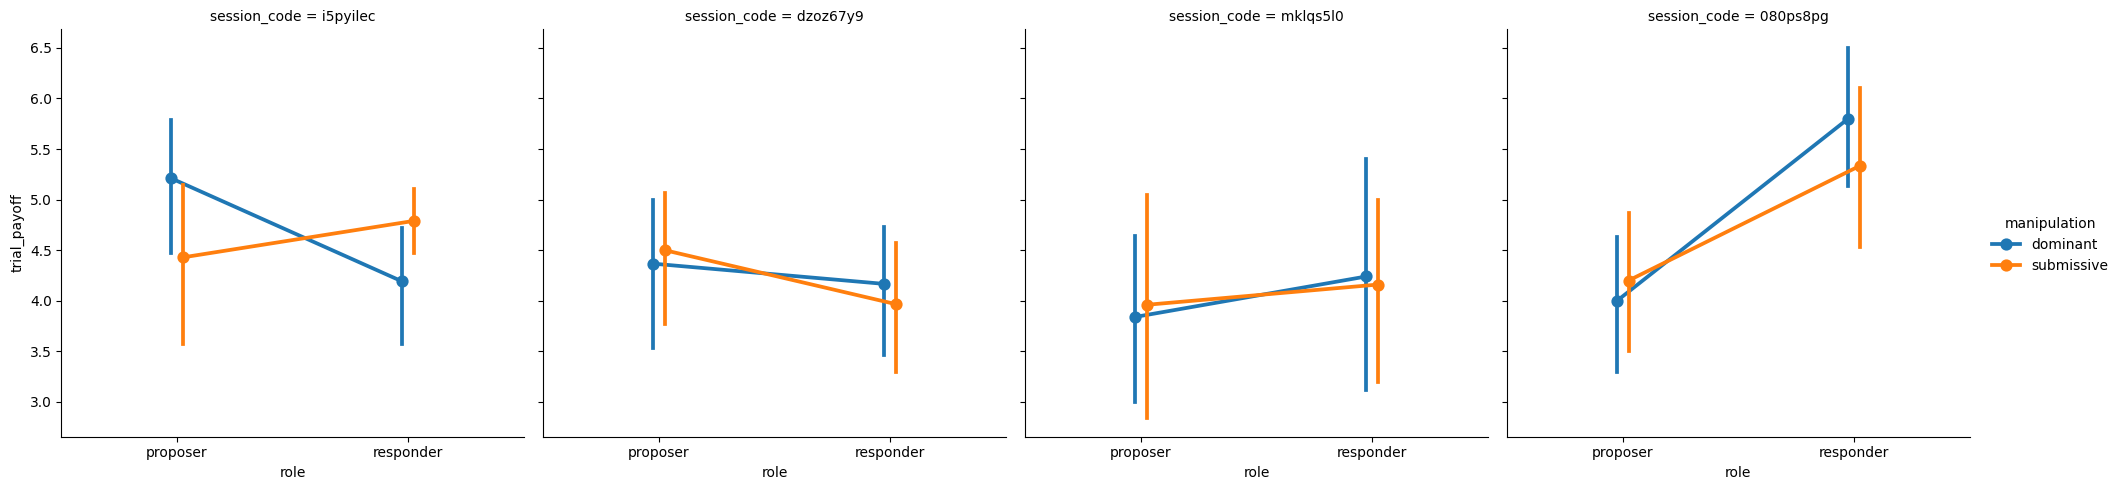

In [75]:
df_analysis = combined_data.groupby(["prolific_id","role", "manipulation"])['trial_payoff'].mean().reset_index()
sns.catplot(x = "role", hue="manipulation", y="trial_payoff", kind = "point", dodge= True, data= combined_data, col = "session_code")

### Reaction time

In [132]:
df_analysis = combined_data.groupby(["prolific_id","role", "manipulation"])['rt'].mean().reset_index()

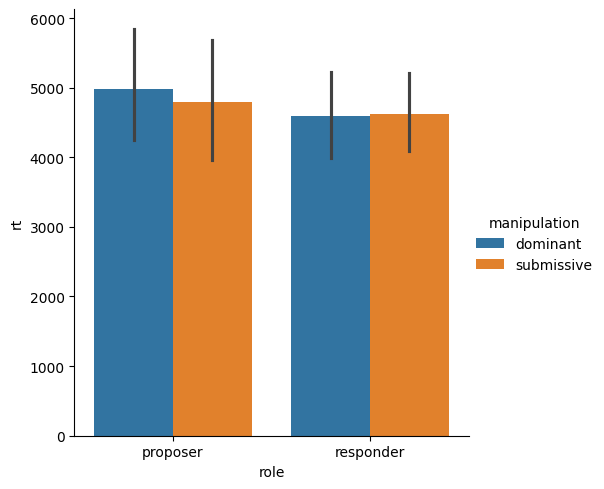

In [133]:
sns.catplot(x = "role", y = "rt", hue = "manipulation", kind = "bar", data = df_analysis)